
# ABCD with RooParametricHist Tutorial

## Input data preparation

In [8]:
#Import Standard libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import ROOT
ROOT.TH1.SetDefaultSumw2()
ROOT.gStyle.SetOptStat(0)

As a first step we want to produce some toy input data. We imagine some BSM particle () decaying in a t-channel topology with an hypothetical mass between 1500 and 5000 GeV. After applying some selections, we are left with the following expected yields for the different signal points and background. 

In [113]:
#signal points expected yields
signals_expected_rates = {

    'mPhi_1500': 1000.25*3,
    'mPhi_2000': 316.1*7,
    'mPhi_3000': 63.5*8,
    'mPhi_4000': 20.3*8,
    'mPhi_5000': 8.6*8,

}

#bkg expected yields
bkg_rate = 1000500.5


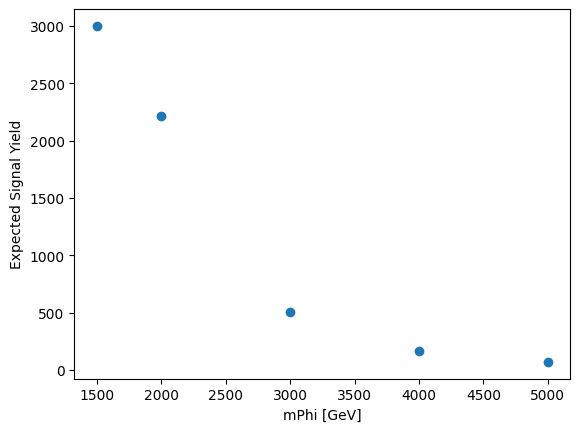

In [114]:
#plot the expected yields for signal as a function of the mass
def plot_expected_signal_yields():
    masses = []
    rates = []
    for key, value in signals_expected_rates.items():
        masses.append(int(key.split('_')[1]))
        rates.append(value)
    plt.plot(masses, rates, 'o')
    plt.xlabel('mPhi [GeV]')
    plt.ylabel('Expected Signal Yield')
    plt.show()

plot_expected_signal_yields()

Here assume there are two discriminating variables x and y that are decorrelated for the background. We assume that both for signal and background the 2D distributions in the x/y plane are multivariate gaussians, and we generate some toys. We produce some physics weights to normalize the samples to the expected yields previously fixed.

In [172]:
#Here generate 2D distributions of the ABCD plane to visualize data
#generate bkg events distributed as a 2D gaussian centred at (0.3,0.3)
bkg = np.random.multivariate_normal([0.2,0.2], [[1.0, 0], [0, 1.0]], 100000)

#compute weights for bkg events
bkg_weights = np.ones(len(bkg)) * bkg_rate / len(bkg)

#generate signal events distributed as a 2D gaussian centred at given centroid 
signals_centroids = {
    'mPhi_1500': [0.63,0.63],
    'mPhi_2000': [0.68,0.68],
    'mPhi_3000': [0.72,0.72],
    'mPhi_4000': [0.76,0.76],
    'mPhi_5000': [0.8,0.8],
}
signals = {}
for signal, rate in signals_expected_rates.items():
    signals[signal] = np.random.multivariate_normal(signals_centroids[signal], [[0.05, 0], [0, 0.05]], 10000)

#compute weights for signal events
signals_weights = {}
for signal, rate in signals_expected_rates.items():
    signals_weights[signal] = np.ones(len(signals[signal])) * rate / len(signals[signal])



Here we visualise the input data in the 2D ABCD plane

/var/folders/n7/k23hsst14zvgd_qk4ljj062r0000gn/T/ipykernel_12056/2717829058.py:8: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde(bkg.T)
/var/folders/n7/k23hsst14zvgd_qk4ljj062r0000gn/T/ipykernel_12056/2717829058.py:9: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  ks = kde.gaussian_kde(signals['mPhi_1500'].T)


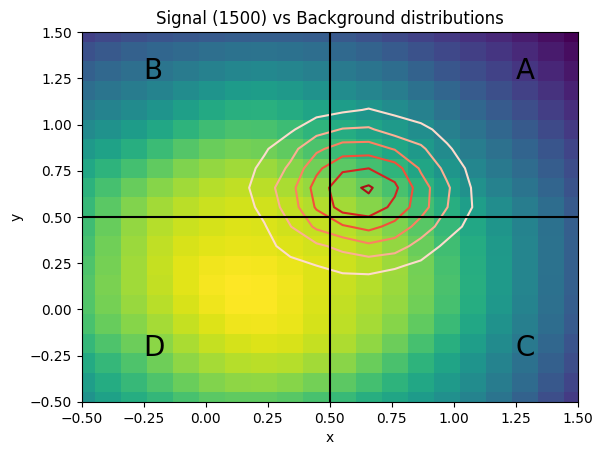

In [173]:
from scipy.stats import kde
#plot the 2D distributions for background in a 2D histogram
fig, ax = plt.subplots()
#set log scale for z axis
x_bkg, y_bkg = bkg.T
x_sgn, y_sgn = signals['mPhi_1500'].T

k = kde.gaussian_kde(bkg.T)
ks = kde.gaussian_kde(signals['mPhi_1500'].T)

nbins = 20
x_bkg_i, y_bkg_i = np.mgrid[-0.5:1.5:nbins*1j, -0.5:1.5:nbins*1j]
z_bkg_i = k(np.vstack([x_bkg_i.flatten(), y_bkg_i.flatten()]))*bkg_weights[0]
z_sgn_i = ks(np.vstack([x_bkg_i.flatten(), y_bkg_i.flatten()]))*signals_weights['mPhi_1500'][0]

plt.pcolormesh(x_bkg_i, y_bkg_i, z_bkg_i.reshape(x_bkg_i.shape),cmap=plt.cm.viridis)
plt.contour(x_bkg_i, y_bkg_i, z_sgn_i.reshape(x_bkg_i.shape), cmap=plt.cm.Reds)

#set limit for the plot and add labels
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')

#plot vertical and orizontal lines to divide the plane in 4 regions (at 0.5 on x and y axis), name them A,B,C,D
plt.axvline(0.5, color='black')
plt.axhline(0.5, color='black')
plt.text(-0.25, 1.25, 'B', fontsize=20)
plt.text(1.25, 1.25, 'A', fontsize=20)
plt.text(-0.25, -0.25, 'D', fontsize=20)
plt.text(1.25, -0.25, 'C', fontsize=20)


#Set title
plt.title('Signal (1500) vs Background distributions')
plt.show()

/var/folders/n7/k23hsst14zvgd_qk4ljj062r0000gn/T/ipykernel_12056/2402127610.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  ks = kde.gaussian_kde(signals['mPhi_5000'].T)


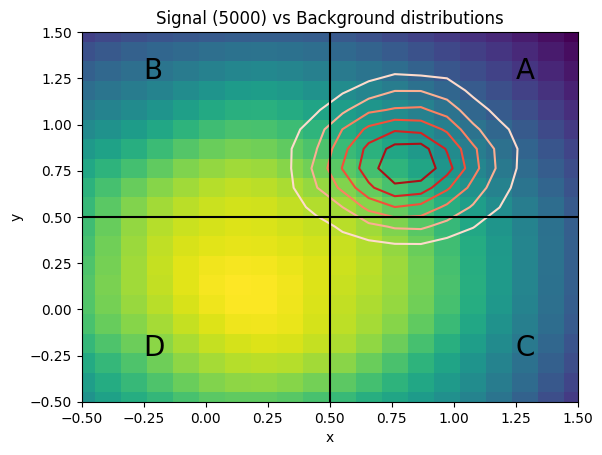

In [174]:
#plot the 2D distributions for background in a 2D histogram 
fig, ax = plt.subplots()
x_sgn, y_sgn = signals['mPhi_5000'].T
ks = kde.gaussian_kde(signals['mPhi_5000'].T)

z_sgn_i = ks(np.vstack([x_bkg_i.flatten(), y_bkg_i.flatten()]))*signals_weights['mPhi_5000'][0]

plt.pcolormesh(x_bkg_i, y_bkg_i, z_bkg_i.reshape(x_bkg_i.shape),cmap=plt.cm.viridis)
plt.contour(x_bkg_i, y_bkg_i, z_sgn_i.reshape(x_bkg_i.shape), cmap=plt.cm.Reds)

#set limit for the plot and add labels
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')

#plot vertical and orizontal lines to divide the plane in 4 regions (at 0.5 on x and y axis), name them A,B,C,D
plt.axvline(0.5, color='black')
plt.axhline(0.5, color='black')
plt.text(-0.25, 1.25, 'B', fontsize=20)
plt.text(1.25, 1.25, 'A', fontsize=20)
plt.text(-0.25, -0.25, 'D', fontsize=20)
plt.text(1.25, -0.25, 'C', fontsize=20)

#Set title
plt.title('Signal (5000) vs Background distributions')
plt.show()

Here we assume that a third variable (z) is uncorrelated with respect to x and y variables defining the ABCD plane. The variable z can be the discriminating observable that we want to fit. For example, assume that the BSM physics will produce some excess in the MET tails, then z could be MET. For the background and the signal we assume an exponentially falling distribution, with different shapes (longer tails for the signal). We assume that the distribution starts from a given threshold (200).

In [175]:
#generate 1D distribution for z observable for bkg (falling exponential in the range 1500-9000)
bkg_z = np.random.exponential(1000, 100000)
#shift the distribution to start at 1500
bkg_z = bkg_z + 200

#generate 1D distribution for z observable for signal (gaussian in the range 1500-9000)
signals_z = {}
for signal, rate in signals_expected_rates.items():
        #take an exponential factor that shift with the signal mass
        signals_z[signal] = np.random.exponential(1000 + 150*(float(signal.split('_')[1])/1500), 10000)
        signals_z[signal] = signals_z[signal] + 200


Here we visualize the distributions of the observables we want to fit

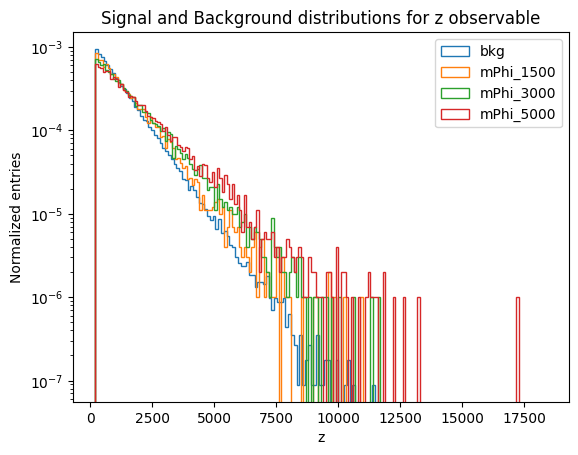

In [176]:
#plot the 1D distributions for z observable for bkg and signal 
bin_edges = np.arange(200, np.max(signals_z['mPhi_5000']), 100)
fig, ax = plt.subplots()
plt.hist(bkg_z, bins=100, weights=bkg_weights, histtype='step', label='bkg', density=True)
for signal, rate in signals_expected_rates.items():
    if signal == 'mPhi_1500' or signal == 'mPhi_3000' or signal == 'mPhi_5000':
        plt.hist(signals_z[signal], bins=bin_edges, weights=signals_weights[signal], histtype='step', label=signal, density=True)
plt.legend()
plt.xlabel('z')
plt.ylabel('Normalized entries')
plt.title('Signal and Background distributions for z observable')
#set log scale for y axis
plt.yscale('log')
plt.show()
    

Here we select events based on the cut that defines the regions A,B,C,D

In [177]:

#put bkg x,y,z and weights in a dataframe
bkg_df = pd.DataFrame(bkg, columns=['x','y'])
bkg_df['z'] = bkg_z
bkg_df['w'] = bkg_weights

#put signal x,y,z and weights in a dataframe
signals_df = {}
for signal, rate in signals_expected_rates.items():
    signals_df[signal] = pd.DataFrame(signals[signal], columns=['x','y'])
    signals_df[signal]['z'] = signals_z[signal]
    signals_df[signal]['w'] = signals_weights[signal]

#choose cuts for the ABCD method: boundaries for x,y at 0.5
cut_A = 'x >= 0.5 and y >= 0.5'
cut_B = 'x < 0.5 and y >= 0.5'
cut_D = 'x <= 0.5 and y < 0.5'
cut_C = 'x > 0.5 and y < 0.5'

#apply the cuts to the dataframes for bkg and signal and save them in new dataframes for A,B,C,D regions
bkg_A = bkg_df.query(cut_A)
bkg_B = bkg_df.query(cut_B)
bkg_C = bkg_df.query(cut_C)
bkg_D = bkg_df.query(cut_D)

signals_A = {}
signals_B = {}
signals_C = {}
signals_D = {}

for signal, rate in signals_expected_rates.items():
    signals_A[signal] = signals_df[signal].query(cut_A)
    signals_B[signal] = signals_df[signal].query(cut_B)
    signals_C[signal] = signals_df[signal].query(cut_C)
    signals_D[signal] = signals_df[signal].query(cut_D)



Printout the expected number of events in each region, as well as the signal significance

In [178]:
#compute number of bkg and signal events in each region based on the weights
n_bkg_A = bkg_A['w'].sum()
n_bkg_B = bkg_B['w'].sum()
n_bkg_C = bkg_C['w'].sum()
n_bkg_D = bkg_D['w'].sum()

n_signals_A = {}
n_signals_B = {}
n_signals_C = {}
n_signals_D = {}

for signal, rate in signals_expected_rates.items():
    n_signals_A[signal] = signals_A[signal]['w'].sum()
    n_signals_B[signal] = signals_B[signal]['w'].sum()
    n_signals_C[signal] = signals_C[signal]['w'].sum()
    n_signals_D[signal] = signals_D[signal]['w'].sum()

#compute s/sqrt(b) for each signal mass point in each region and print the results
for signal, rate in signals_expected_rates.items():
    s = n_signals_A[signal]
    b = n_bkg_A
    print("***************************************")
    #print number of signal events
    print(f'background in region A: {b}')
    if b > 0:
        print(f'{signal} in region A: s/sqrt(b) = {s/np.sqrt(b)}')
    else:
        print(f'{signal} in region A: s/sqrt(b) = inf')

    s = n_signals_B[signal]
    b = n_bkg_B
    print(f'background in region B: {b}')

    if b > 0:
        print(f'{signal} in region B: s/sqrt(b) = {s/np.sqrt(b)}')
    else:
        print(f'{signal} in region B: s/sqrt(b) = inf')

    s = n_signals_C[signal]
    b = n_bkg_C
    print(f'background in region C: {b}')

    if b > 0:
        print(f'{signal} in region C: s/sqrt(b) = {s/np.sqrt(b)}')
    else:
        print(f'{signal} in region C: s/sqrt(b) = inf')

    s = n_signals_D[signal]
    b = n_bkg_D
    print(f'background in region D: {b}')

    if b > 0:
        print(f'{signal} in region D: s/sqrt(b) = {s/np.sqrt(b)}')
    else:
        print(f'{signal} in region D: s/sqrt(b) = inf')
    print("***************************************")

***************************************
background in region A: 144852.46239
mPhi_1500 in region A: s/sqrt(b) = 4.108544041835865
background in region B: 235697.90779
mPhi_1500 in region B: s/sqrt(b) = 1.2670851820956606
background in region C: 237438.77866
mPhi_1500 in region C: s/sqrt(b) = 1.2076235776455797
background in region D: 382511.35116
mPhi_1500 in region D: s/sqrt(b) = 0.3774741779499658
***************************************
***************************************
background in region A: 144852.46239
mPhi_2000 in region A: s/sqrt(b) = 3.62664432425428
background in region B: 235697.90779
mPhi_2000 in region B: s/sqrt(b) = 0.7593109610592202
background in region C: 237438.77866
mPhi_2000 in region C: s/sqrt(b) = 0.7492567345879013
background in region D: 382511.35116
mPhi_2000 in region D: s/sqrt(b) = 0.15956411610175888
***************************************
***************************************
background in region A: 144852.46239
mPhi_3000 in region A: s/sqrt(b) = 0.

Printout the expected yields for the background in regions A,B,C,D

In [179]:
print("bkg A: ", n_bkg_A)
print("bkg B: ", n_bkg_B)
print("bkg C: ", n_bkg_C)
print("bkg D: ", n_bkg_D)

bkg A:  144852.46239
bkg B:  235697.90779
bkg C:  237438.77866
bkg D:  382511.35116


Compute total expected predicted number of events in region A applying the ABCD method and expected closure of normalization

In [180]:
#compute for bkg B*C/D
predicted_A = n_bkg_B * (n_bkg_C/n_bkg_D)

print("predicted A: " , predicted_A)
print("closure : " , (np.abs(predicted_A - n_bkg_A)/(n_bkg_A))*100)

predicted A:  146306.30748253505
closure :  1.0036730260205886


Here we want to check qualitatively that the shape of the observable in the 4 regions is the same

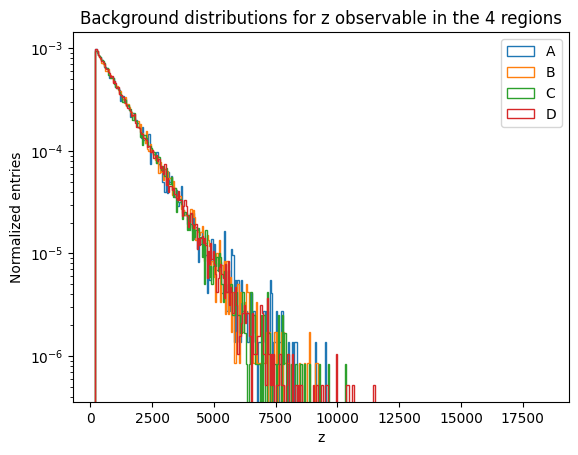

In [181]:
#now plot the shape of the z observable in the 4 regions for bkg
bin_edges = np.arange(200, np.max(signals_z['mPhi_5000']), 50)

fig, ax = plt.subplots()
plt.hist(bkg_A['z'], bins=bin_edges, weights=bkg_A['w'], histtype='step', label='A', density=True)
plt.hist(bkg_B['z'], bins=bin_edges, weights=bkg_B['w'], histtype='step', label='B', density=True)
plt.hist(bkg_C['z'], bins=bin_edges, weights=bkg_C['w'], histtype='step', label='C', density=True)
plt.hist(bkg_D['z'], bins=bin_edges, weights=bkg_D['w'], histtype='step', label='D', density=True)

plt.legend()
plt.xlabel('z')
plt.ylabel('Normalized entries')
plt.title('Background distributions for z observable in the 4 regions')
#set log scale
plt.yscale('log')
plt.show()

In [182]:
#now plot the shape of the z observable in the 4 regions for signal
new_bin_edges =  [200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 14000]

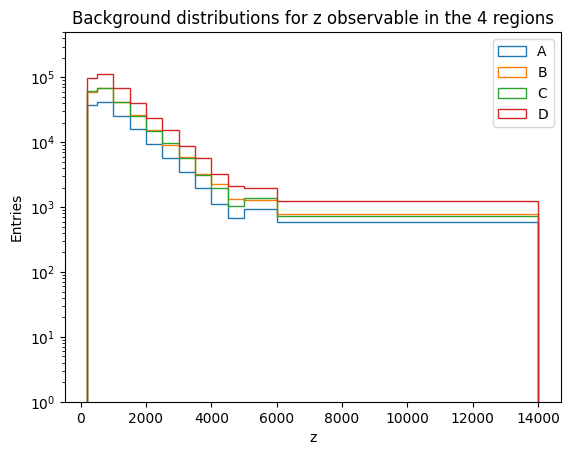

In [183]:
#plot the shape of the z observable in the 4 regions for bkg with the optimal binning
fig, ax = plt.subplots()
plt.hist(bkg_A['z'], bins=new_bin_edges, weights=bkg_A['w'], histtype='step', label='A')
plt.hist(bkg_B['z'], bins=new_bin_edges, weights=bkg_B['w'], histtype='step', label='B')
plt.hist(bkg_C['z'], bins=new_bin_edges, weights=bkg_C['w'], histtype='step', label='C')
plt.hist(bkg_D['z'], bins=new_bin_edges, weights=bkg_D['w'], histtype='step', label='D')

plt.legend()
plt.xlabel('z')
plt.ylabel('Entries')
#set y axis lower limit to 1
plt.ylim(1, 5.0*10**5)


plt.title('Background distributions for z observable in the 4 regions')
#set log scale
plt.yscale('log')
plt.show()

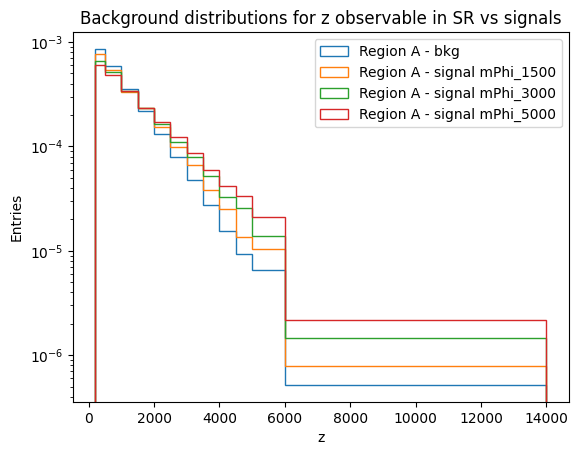

In [188]:
#plot signals with the optimal binning (normalize histograms) together with background signals_z[signal]
fig, ax = plt.subplots()
plt.hist(bkg_A['z'], bins=new_bin_edges, weights=bkg_A['w'], histtype='step', label='Region A - bkg', density=True)
plt.hist(signals_A['mPhi_1500']["z"], bins=new_bin_edges, weights=signals_A['mPhi_1500']['w'], histtype='step', label=f'Region A - signal mPhi_1500', density=True)
plt.hist(signals_A['mPhi_3000']["z"], bins=new_bin_edges, weights=signals_A['mPhi_3000']['w'], histtype='step', label=f'Region A - signal mPhi_3000', density=True)
plt.hist(signals_A['mPhi_5000']["z"], bins=new_bin_edges, weights=signals_A['mPhi_5000']['w'], histtype='step', label=f'Region A - signal mPhi_5000', density=True)

plt.legend()
plt.xlabel('z')
plt.ylabel('Entries')

plt.title('Background distributions for z observable in SR vs signals')
#set log scale
plt.yscale('log')
plt.show()






Saving the histograms of each region in root files 

In [189]:
ROOT.TH1.SetDefaultSumw2()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(False)
ROOT.gROOT.SetBatch(ROOT.kTRUE)
from array import array

#Saving the distributions in ROOT TH1F
#use FillN to fill the histograms with weights
h_A_bkg = ROOT.TH1F('h_bkg_A', 'h_bkg_A', len(new_bin_edges)-1, array('d',new_bin_edges))
h_B_bkg = ROOT.TH1F('h_bkg_B', 'h_bkg_B', len(new_bin_edges)-1, array('d',new_bin_edges))
h_C_bkg = ROOT.TH1F('h_bkg_C', 'h_bkg_C', len(new_bin_edges)-1, array('d',new_bin_edges))
h_D_bkg = ROOT.TH1F('h_bkg_D', 'h_bkg_D', len(new_bin_edges)-1, array('d',new_bin_edges))

#use FillN to fill the histograms (for now set weights to 1)
h_A_bkg.FillN(len(bkg_A['z']), bkg_A['z'].values, bkg_A['w'].values)
h_B_bkg.FillN(len(bkg_B['z']), bkg_B['z'].values, bkg_B['w'].values)
h_C_bkg.FillN(len(bkg_C['z']), bkg_C['z'].values, bkg_C['w'].values)
h_D_bkg.FillN(len(bkg_D['z']), bkg_D['z'].values, bkg_D['w'].values)


#save histograms for signals
h_A_signals = {}
h_B_signals = {}
h_C_signals = {}
h_D_signals = {}

for signal, rate in signals_expected_rates.items():
    h_A_signals[signal] = ROOT.TH1F(f'h_sgn_A', f'h_sgn_{signal}_A', len(new_bin_edges)-1, array('d',new_bin_edges))
    h_B_signals[signal] = ROOT.TH1F(f'h_sgn_B', f'h_sgn_{signal}_B', len(new_bin_edges)-1, array('d',new_bin_edges))
    h_C_signals[signal] = ROOT.TH1F(f'h_sgn_C', f'h_sgn_{signal}_C', len(new_bin_edges)-1, array('d',new_bin_edges))
    h_D_signals[signal] = ROOT.TH1F(f'h_sgn_D', f'h_sgn_{signal}_D', len(new_bin_edges)-1, array('d',new_bin_edges))

    h_A_signals[signal].FillN(len(signals_A[signal]['z']), signals_A[signal]['z'].values, signals_A[signal]['w'].values)
    h_B_signals[signal].FillN(len(signals_B[signal]['z']), signals_B[signal]['z'].values, signals_B[signal]['w'].values)
    h_C_signals[signal].FillN(len(signals_C[signal]['z']), signals_C[signal]['z'].values, signals_C[signal]['w'].values)
    h_D_signals[signal].FillN(len(signals_D[signal]['z']), signals_D[signal]['z'].values, signals_D[signal]['w'].values)


Warning in <TROOT::Append>: Replacing existing TH1: h_bkg_A (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_bkg_B (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_bkg_C (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_bkg_D (Potential memory leak).


In [190]:
#save histograms in a root file (create directory for background in current directory and separate one for signals)
f = ROOT.TFile('background.root', 'recreate')
#save each histogram in a tdirectory with the region name
d_A = f.mkdir('A')
d_A.cd()
h_A_bkg.Write()
f.cd()
d_B = f.mkdir('B')
d_B.cd()
h_B_bkg.Write()
f.cd()
d_C = f.mkdir('C')
d_C.cd()
h_C_bkg.Write()
f.cd()
d_D = f.mkdir('D')
d_D.cd()
h_D_bkg.Write()
#close file
f.Close()

#save each signal in a separate file
for signal, rate in signals_expected_rates.items():
    f = ROOT.TFile(f'{signal}.root', 'recreate')
    d_A = f.mkdir('A')
    d_A.cd()
    h_A_signals[signal].Write()
    f.cd()
    d_B = f.mkdir('B')
    d_B.cd()
    h_B_signals[signal].Write()
    f.cd()
    d_C = f.mkdir('C')
    d_C.cd()
    h_C_signals[signal].Write()
    f.cd()
    d_D = f.mkdir('D')
    d_D.cd()
    h_D_signals[signal].Write()
    f.Close()
